In [1]:
import numpy as np
import pandas as pd

In [2]:
#path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'
#loan_df = pd.read_csv(path)

In [3]:
path = 'D:\COURSERA\DATA SCIENCE\IBM\ML with Python_Programms\loan_df.csv'

In [4]:
loan_df = pd.read_csv(path)

In [5]:
loan_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
loan_df = loan_df.drop(['Unnamed: 0'], axis = 1)

In [7]:
loan_df.head()

,Unnamed: 0.1,Unnamed: 0.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [8]:
loan_df = loan_df.drop(['Unnamed: 0.1'], axis = 1)

In [9]:
loan_df.head()

,Unnamed: 0.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [10]:
loan_df = loan_df.drop(['Unnamed: 0.1.1'], axis = 1)

In [11]:
loan_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [12]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [13]:
loan_df.shape

(346, 8)

# Convertion of DATE-TIME object

In [14]:
loan_df['effective_date'] = pd.to_datetime(loan_df['effective_date']) 

In [15]:
loan_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,9/22/2016,27,college,male
3,PAIDOFF,1000,30,2016-09-09,10/8/2016,28,college,female
4,PAIDOFF,1000,30,2016-09-09,10/8/2016,29,college,male


In [16]:
loan_df['due_date'] = pd.to_datetime(loan_df['due_date'])
loan_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing

In [17]:
loan_df['loan_status'].value_counts().to_frame()

,loan_status
PAIDOFF,260
COLLECTION,86


In [18]:
loan_df['education'].value_counts().to_frame()

,education
High School or Below,151
college,149
Bechalor,44
Master or Above,2


In [19]:
loan_df['Gender'].value_counts().to_frame()

,Gender
male,294
female,52


## Let's plot some columns to underestand data better:

In [20]:
import seaborn as sns

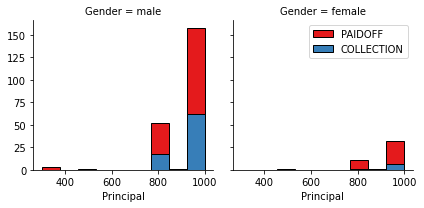

In [21]:
bins = np.linspace(loan_df.Principal.min(), loan_df.Principal.max(), 10)
g = sns.FacetGrid(loan_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

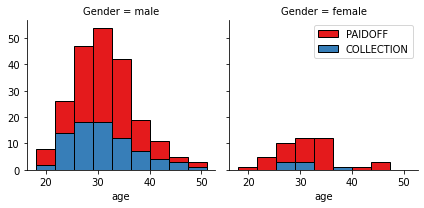

In [22]:
bins = np.linspace(loan_df.age.min(), loan_df.age.max(), 10)
g = sns.FacetGrid(loan_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing: Feature selection/extraction

## Let's look at the day of the week people get the loan

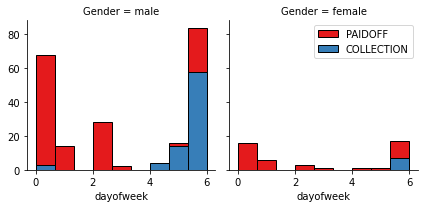

In [23]:
loan_df['dayofweek'] = loan_df['effective_date'].dt.dayofweek
bins = np.linspace(loan_df.dayofweek.min(), loan_df.dayofweek.max(), 10)
g = sns.FacetGrid(loan_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

<AxesSubplot:ylabel='Frequency'>

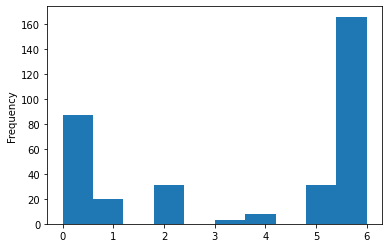

In [24]:
loan_df['dayofweek'] = loan_df['effective_date'].dt.dayofweek
loan_df['dayofweek'].plot(kind = 'hist')

### We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4

In [25]:
loan_df['weekend'] = loan_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
loan_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Let's look at gender:

In [26]:
loan_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

Let's convert male to 0 and female to 1:

In [27]:
loan_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
loan_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?

In [28]:
loan_df.groupby(['education'])['loan_status'].value_counts(normalize=True).to_frame()

loan_status
education            loan_status             
Bechalor             PAIDOFF         0.750000
                     COLLECTION      0.250000
High School or Below PAIDOFF         0.741722
                     COLLECTION      0.258278
Master or Above      COLLECTION      0.500000
                     PAIDOFF         0.500000
college              PAIDOFF         0.765101
                     COLLECTION      0.234899

#### Features before One Hot Encoding

In [29]:
loan_df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [30]:
Feature = loan_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(loan_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection

Let's define feature sets, X:

In [31]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [32]:
y = loan_df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data

Data Standardization give data zero mean and unit variance (technically should be done after train test split)

In [33]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification
Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model You should use the following algorithm:

* #### K Nearest Neighbor(KNN)
* #### Decision Tree
* #### Support Vector Machine
* ##### Logistic Regression

__ Notice:__

You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
yhat = neigh.predict(X_test)
yhat[0:5]
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8152173913043478
Test set Accuracy:  0.6857142857142857


In [36]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286])

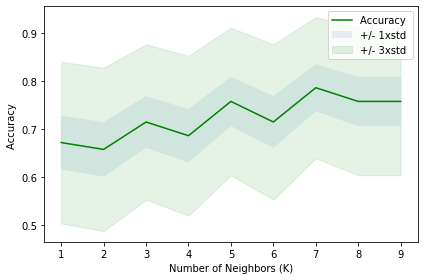

In [37]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [38]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=7)

In [39]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# Decision Tree

In [40]:
loan_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


Now train_test_split will return 4 different parameters. We will name them:
X_trainset, X_testset, y_trainset, y_testset

The train_test_split will need the parameters:
X, y, test_size=0.3, and random_state=3.

The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.

In [41]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [42]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (242, 8) &  Size of Y training set (242,)


In [43]:
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

Shape of X training set (104, 8) &  Size of Y training set (104,)


In [44]:
import sys
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset

In [45]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [46]:
loanTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [47]:
predTree = loanTree.predict(X_testset)

You can print out predTree and y_testset if you want to visually compare the predictions to the actual values.

In [48]:
print (predTree [0:5])
print (y_testset [0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF']


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>

In [49]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6538461538461539


<hr>
<div id = "VISUALIZATION">
    <h1> VISUALIZATION </h1>
    
Let's visualize the tree
</div>

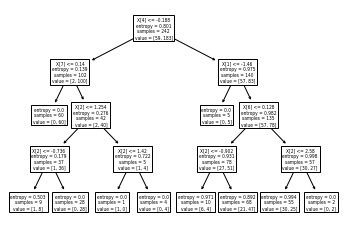

In [50]:
tree.plot_tree(loanTree)
plt.show()

# Support Vector Machine

In [51]:
loan_df.head(2)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0


In [52]:
loan_df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [53]:
loan_df['status'] = loan_df['loan_status']

In [54]:
loan_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,status
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0,PAIDOFF
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0,PAIDOFF
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0,PAIDOFF
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1,PAIDOFF
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1,PAIDOFF


In [55]:
loan_df['status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,2],inplace=True)
loan_df.head(2)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,status
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0,1
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0,1


In [56]:
loan_df['status'].value_counts().to_frame()

,status
1,260
2,86


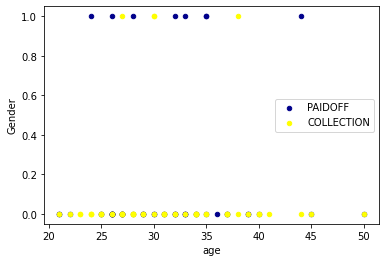

In [57]:
ax = loan_df[loan_df['status'] == 1][0:50].plot(kind='scatter', x='age', y='Gender', color='DarkBlue', label='PAIDOFF');
loan_df[loan_df['status'] == 2][0:50].plot(kind='scatter', x='age', y='Gender', color='Yellow', label='COLLECTION', ax=ax);
plt.show()

In [58]:
loan_df.dtypes

loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                     int64
dayofweek                  int64
weekend                    int64
status                     int64
dtype: object

loan_df = loan_df[pd.to_numeric(loan_df['education'], errors='coerce').notnull()]
loan_df['education'] = loan_df['education'].astype('int')
loan_df.dtypes

loan_df['loan_status'] = loan_df['loan_status'].astype('int')
y = np.asarray(loan_df['loan_status'])
y [0:5]

In [71]:
y1 = loan_df['status'].values

In [72]:
y1[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [73]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( X, y1, test_size=0.2, random_state=4)
print ('Train set:', X_train1.shape,  y_train1.shape)
print ('Test set:', X_test1.shape,  y_test1.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [87]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train1, y_train1) 

SVC()

In [88]:
yhat1 = clf.predict(X_test1)
yhat1 [0:5]

array([2, 1, 1, 1, 1], dtype=int64)

In [89]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [90]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.81      0.87      0.84        55
           2       0.36      0.27      0.31        15

    accuracy                           0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70

Confusion matrix, without normalization
[[4 0]
 [0 0]]


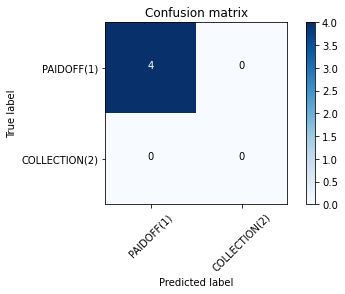

In [91]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test1, yhat1, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test1, yhat1))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(1)','COLLECTION(2)'],normalize= False,  title='Confusion matrix')

In [80]:
from sklearn.metrics import f1_score
f1_score(y_test1, yhat1, average='weighted') 

0.7275882012724117

In [81]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test1, yhat1,pos_label=2)

0.18181818181818182

# Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train1,y_train1)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [95]:
yhat2 = LR.predict(X_test1)
yhat2

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [102]:
yhat_prob = LR.predict_proba(X_test1)
yhat_prob[0:2]

array([[0.5 , 0.5 ],
       [0.55, 0.45]])

In [98]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test1, yhat2,pos_label=1)

0.6764705882352942

Confusion matrix, without normalization
[[46  0]
 [ 0  0]]


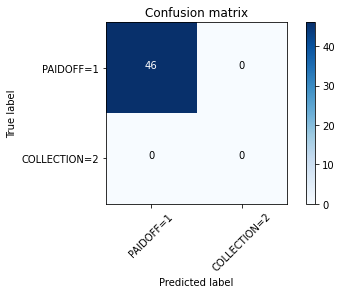

In [99]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test1, yhat2, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF=1','COLLECTION=2'],normalize= False,  title='Confusion matrix')

In [100]:
print (classification_report(y_test1, yhat2))

              precision    recall  f1-score   support

           1       0.78      0.84      0.81        55
           2       0.18      0.13      0.15        15

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70



In [101]:
from sklearn.metrics import log_loss
log_loss(y_test1, yhat_prob)

0.5772287609479654